# links
https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
def get_fremont_data(filename="Fremont.csv",url=URL):
    
    if not os.path.exists(filename):
        urlretrieve(url,filename)
    data = pd.read_csv("Fremont.csv",index_col = "Date", parse_dates=True).drop("Fremont Bridge Total",axis=1)
    data.columns = ["West","East"]
    data["Total"] = data["West"] + data["East"]
    return data

In [4]:
data = get_fremont_data()

In [5]:
data.head()

,West,East,Total
Date,,,
2019-11-01 00:00:00,7.0,5.0,12.0
2019-11-01 01:00:00,0.0,7.0,7.0
2019-11-01 02:00:00,0.0,1.0,1.0
2019-11-01 03:00:00,6.0,0.0,6.0
2019-11-01 04:00:00,5.0,1.0,6.0


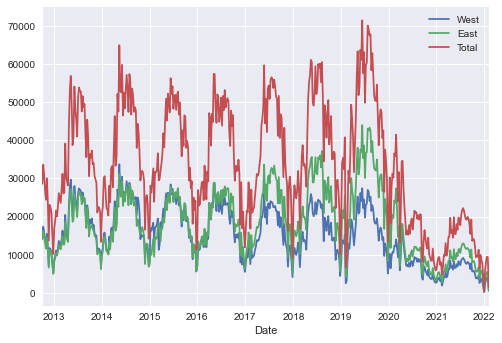

In [6]:
data.resample("W").sum().plot();

(0.0, 2526780.65)

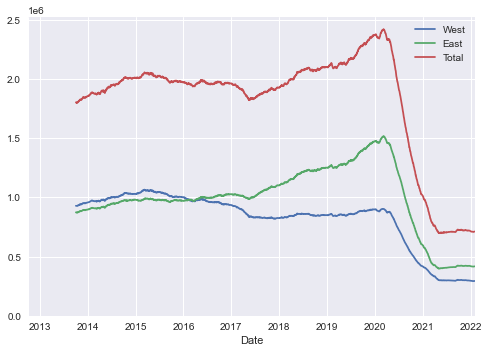

In [7]:


ax = data.resample("D").sum().rolling(365).sum().plot();
ax.set_ylim(0,None)

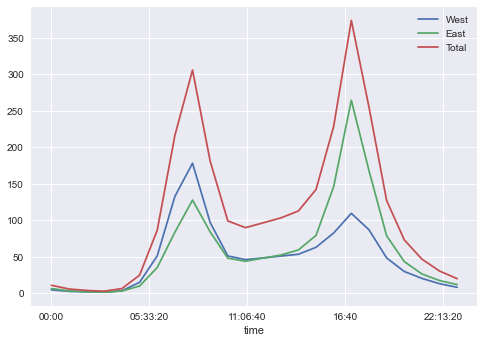

In [8]:
data.groupby(data.index.time).mean().plot();

In [9]:
pivoted = data.pivot_table("Total", index = data.index.time, columns=data.index.date)

In [10]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

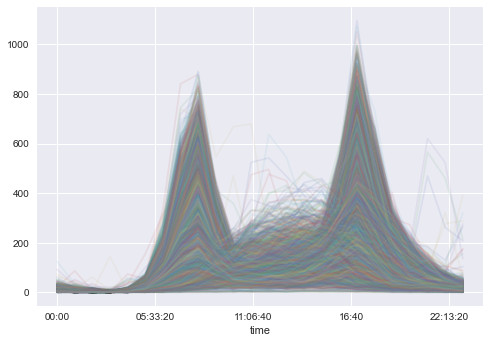

In [11]:
pivoted.plot(legend=False,alpha=0.01)